In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns; sns.set()
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [2]:
#question 1
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

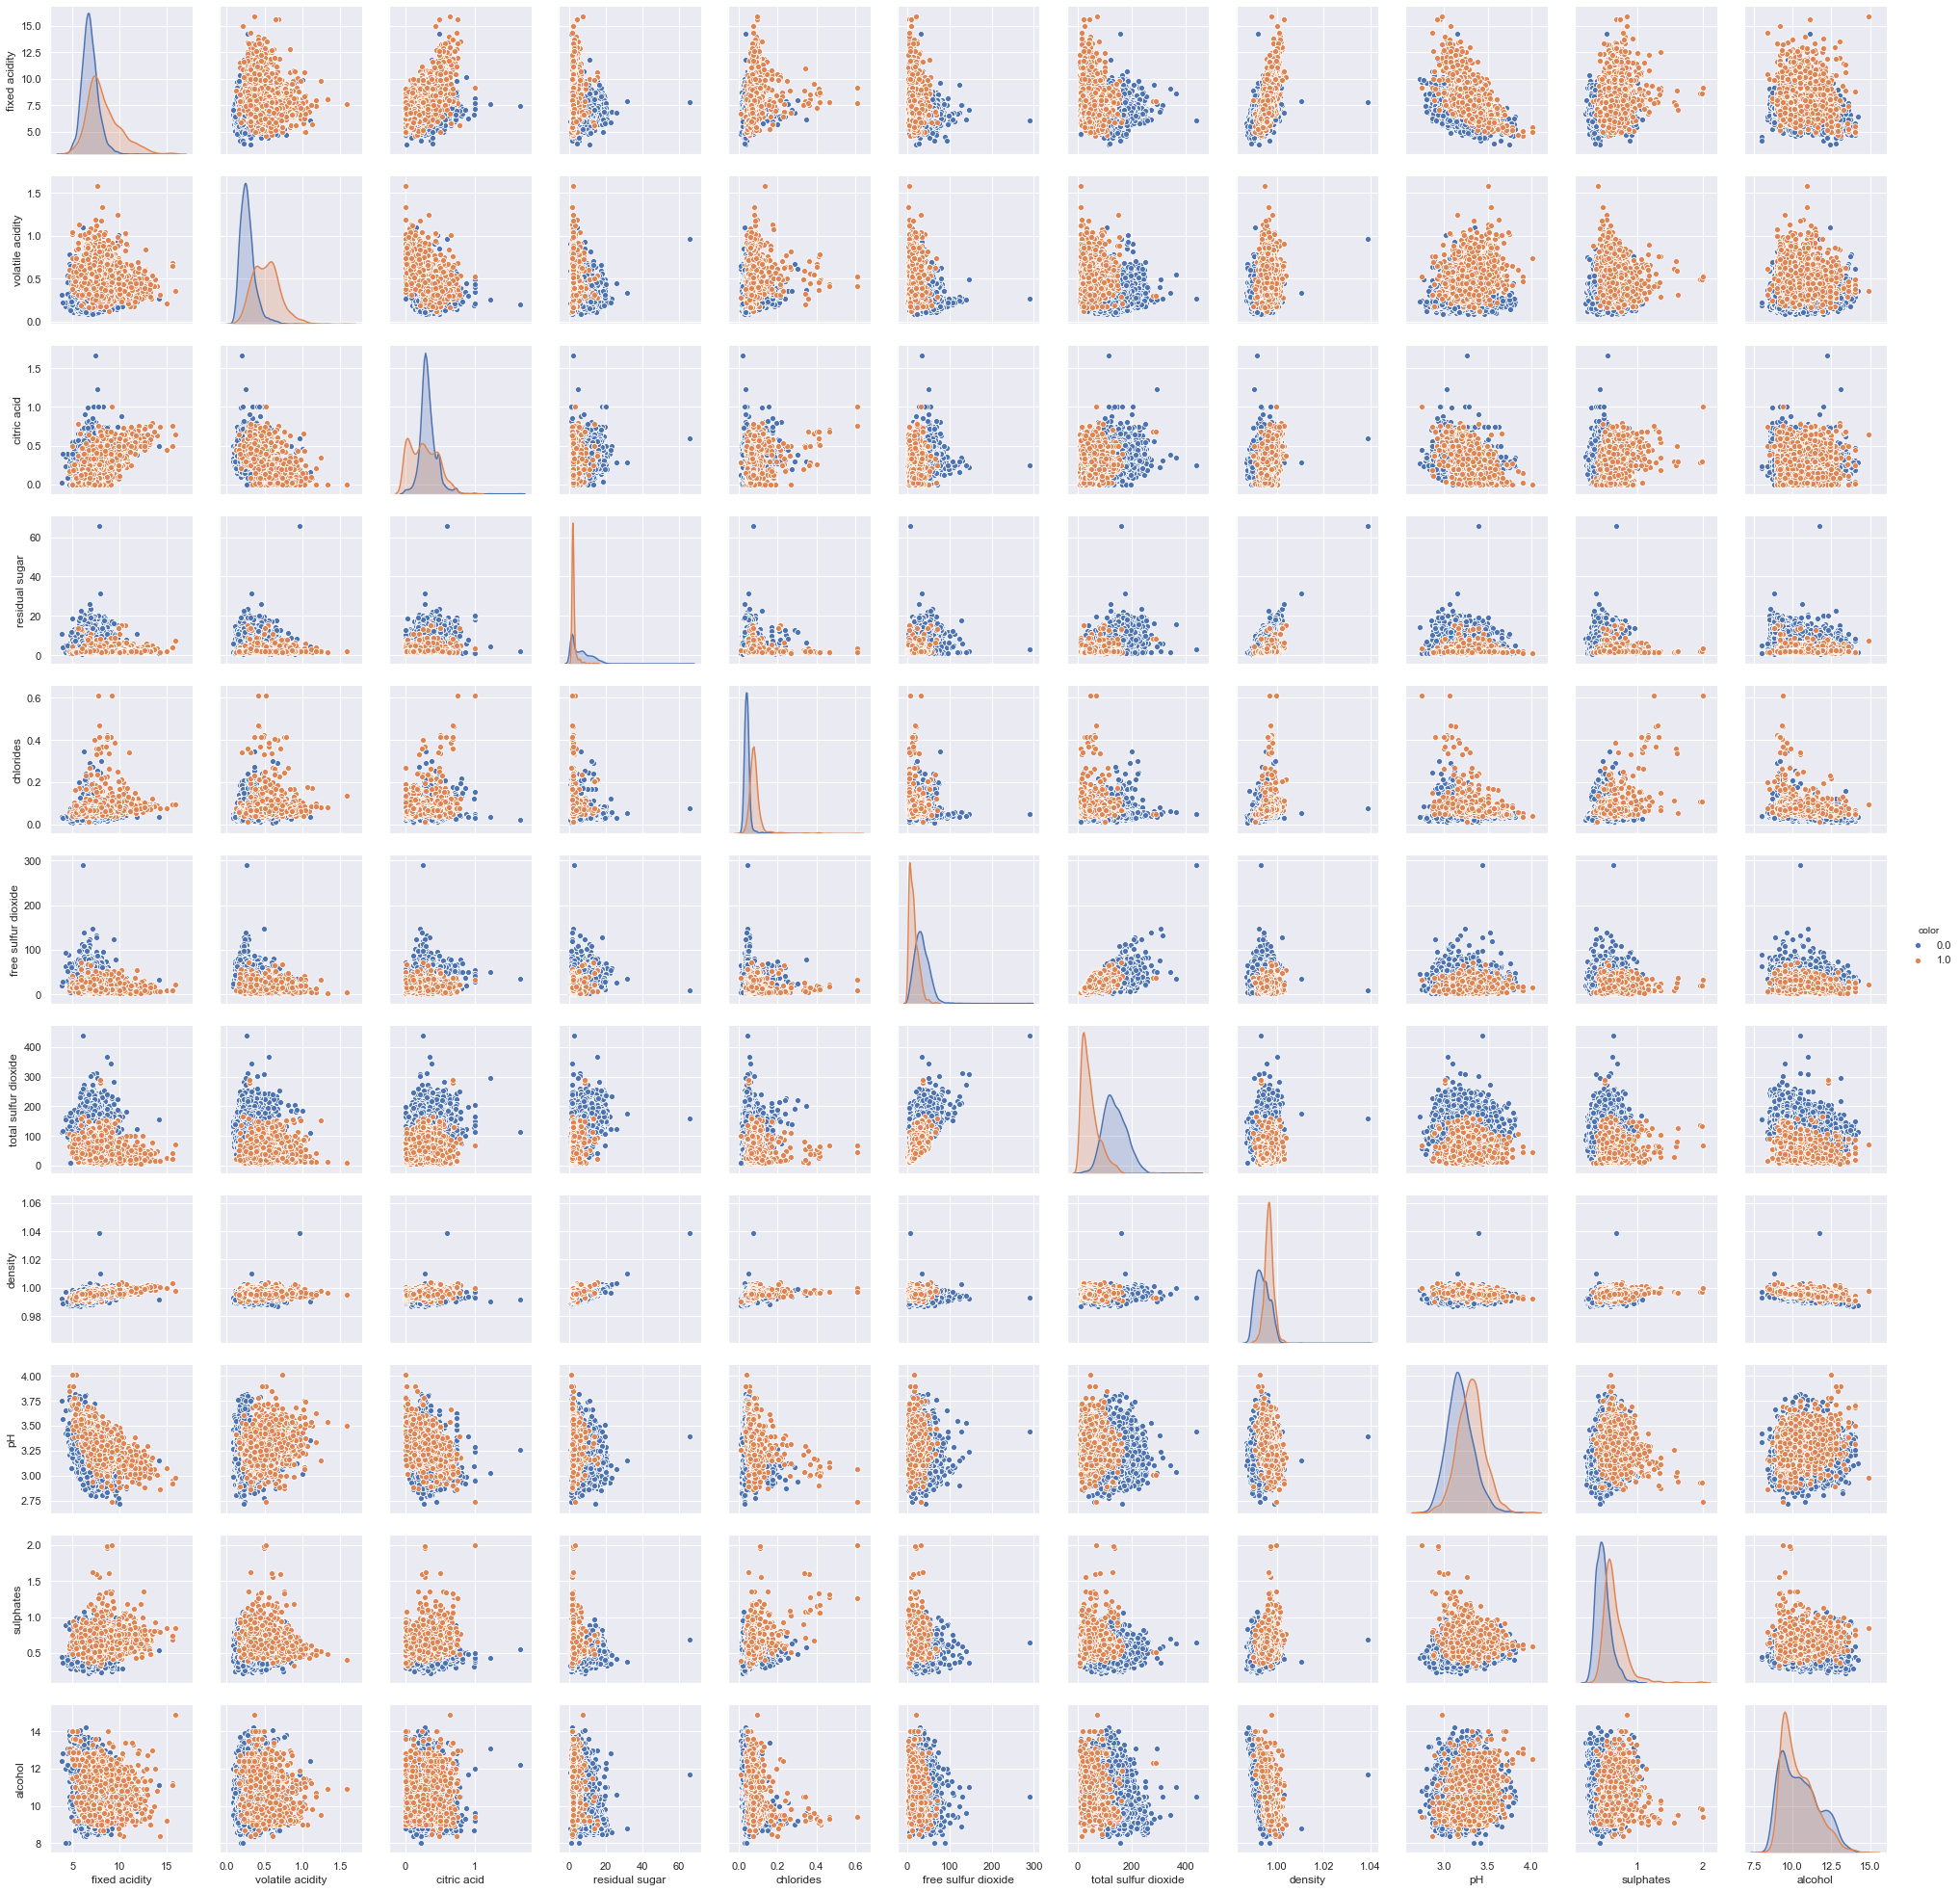

In [3]:
g = sns.pairplot(wine[DC],vars=D,hue="color") #pairplot without normalization

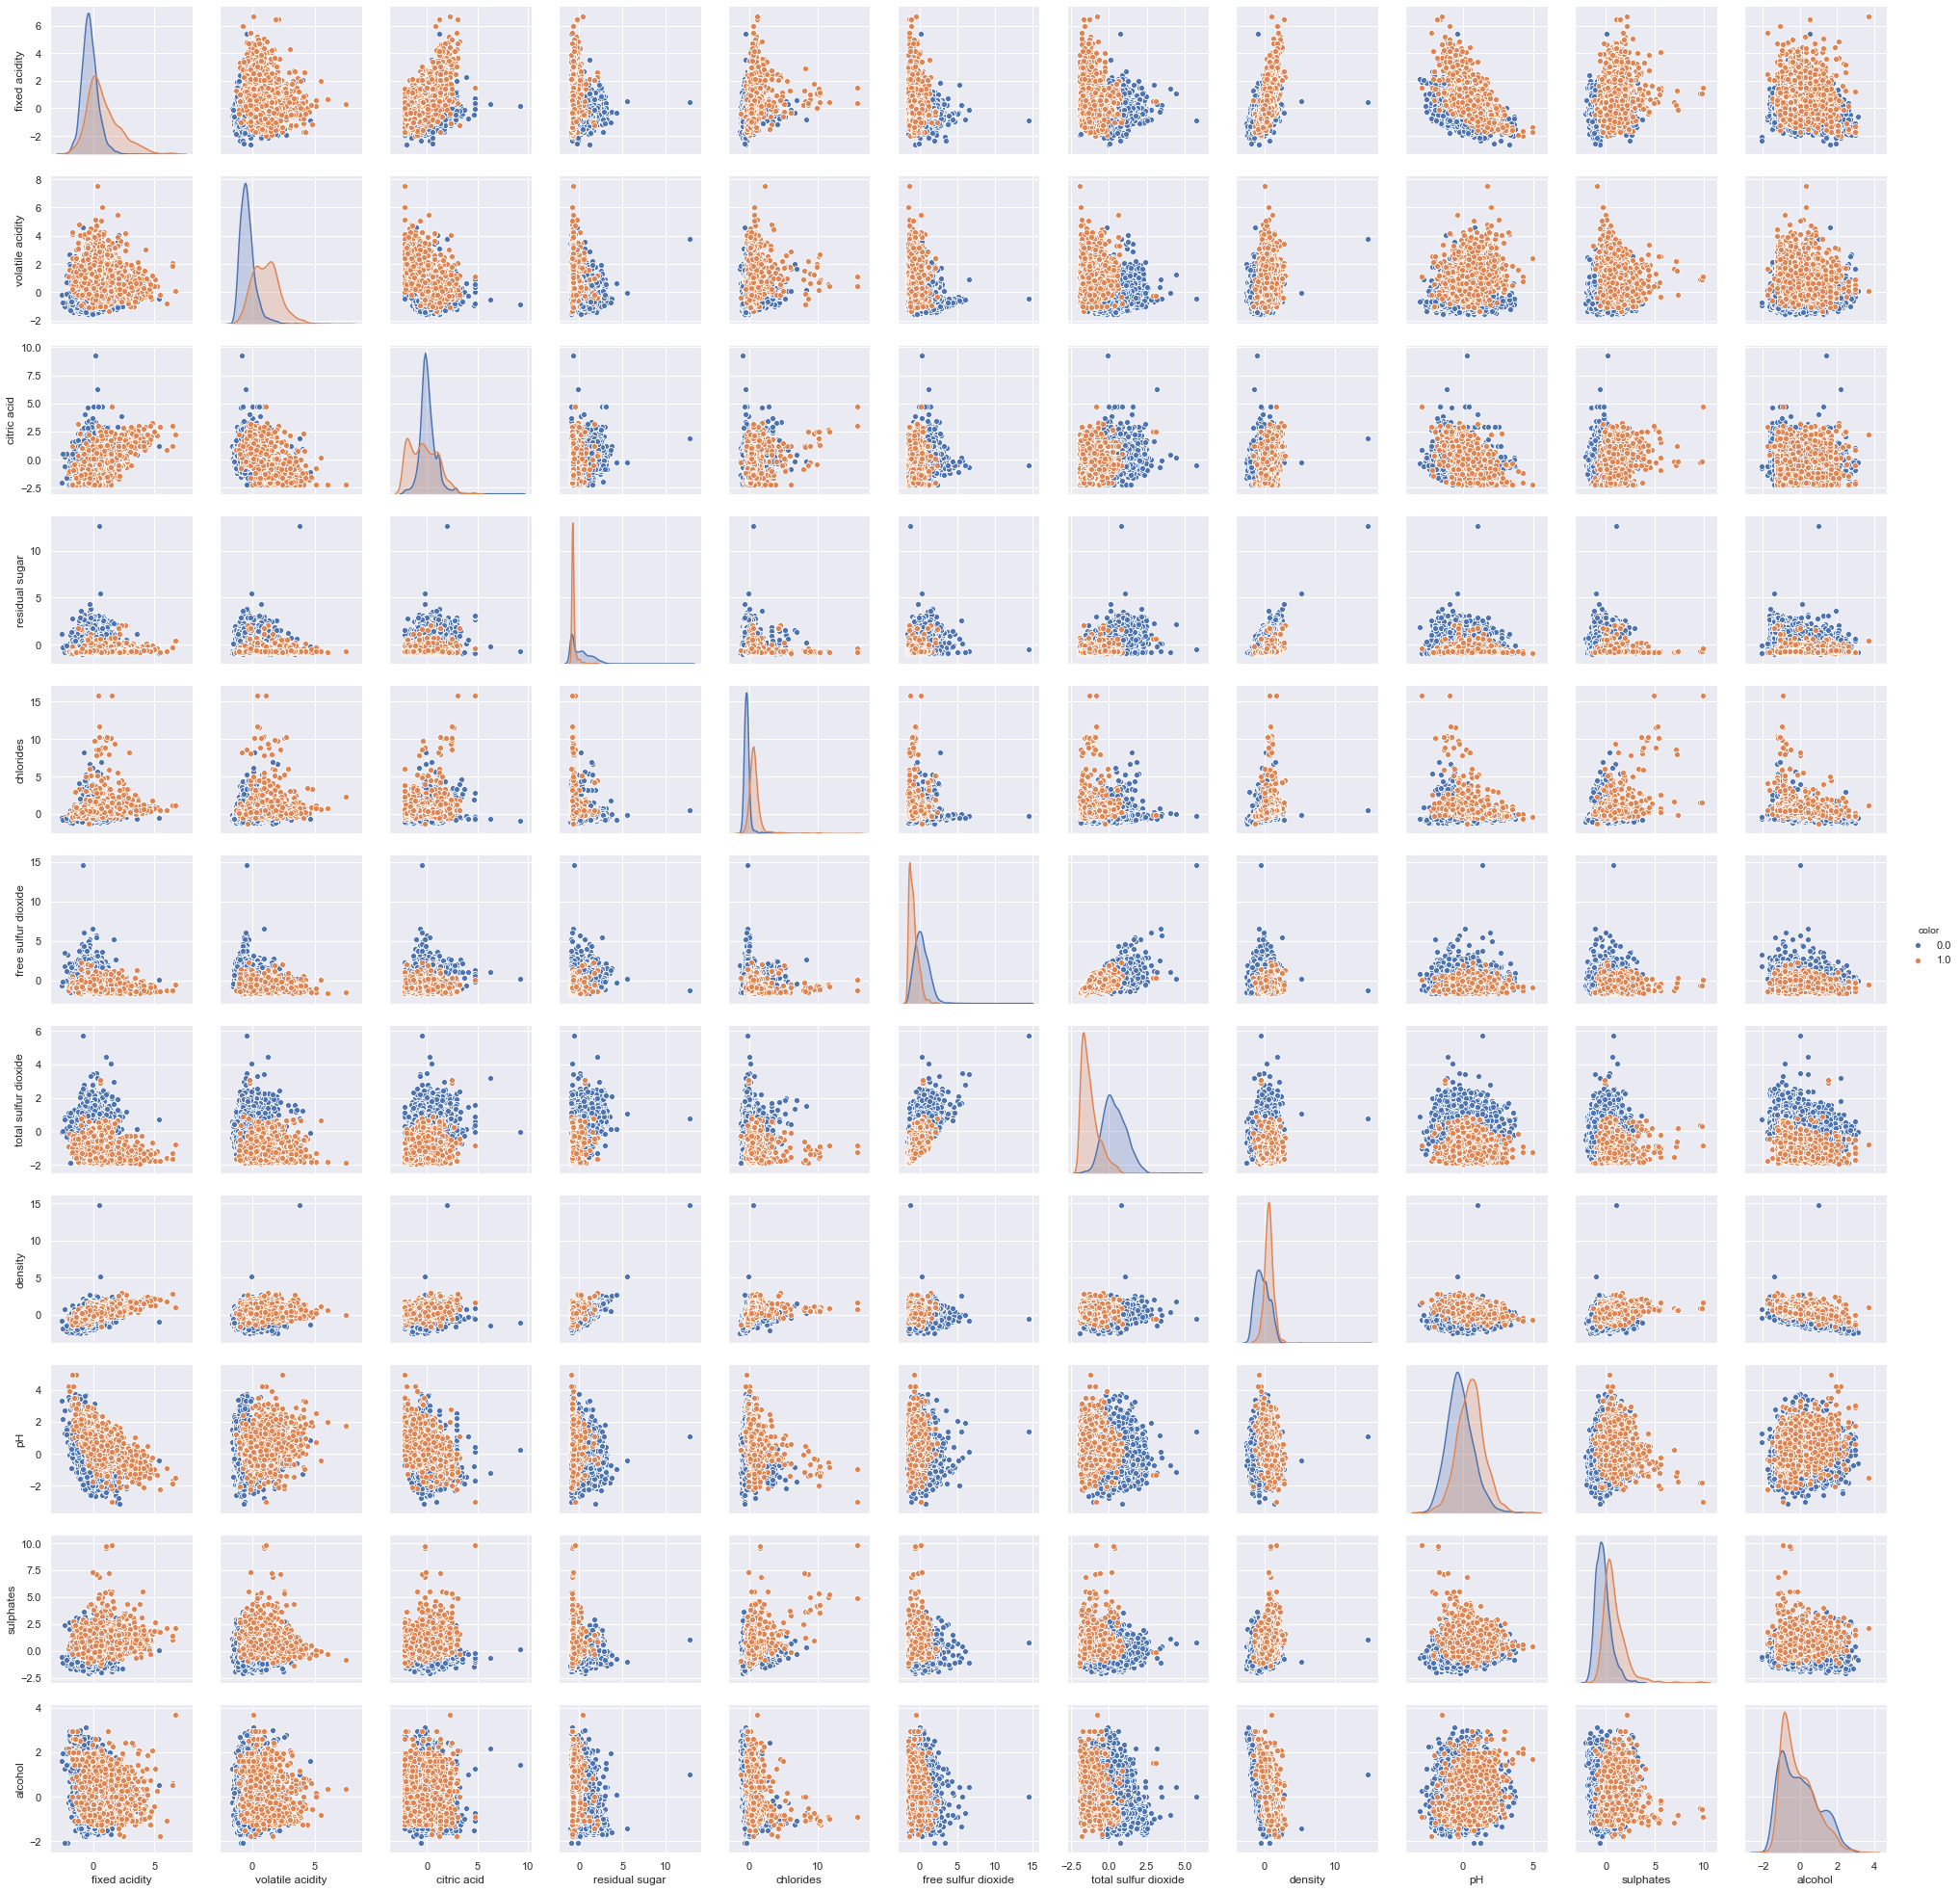

In [4]:
from sklearn.preprocessing import StandardScaler
zScore=StandardScaler()
zScore.fit(wine[D])
wine[D]=zScore.transform(wine[D])
g = sns.pairplot(wine[DC],vars= D ,hue="color")

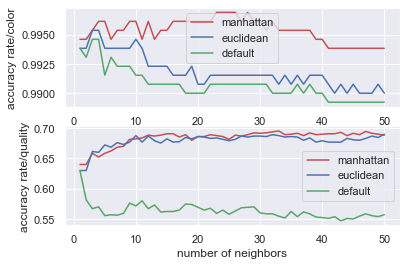

In [5]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[D].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
neighbors=range(1,51)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

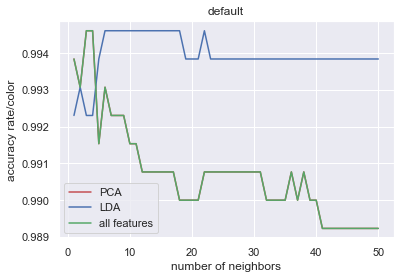

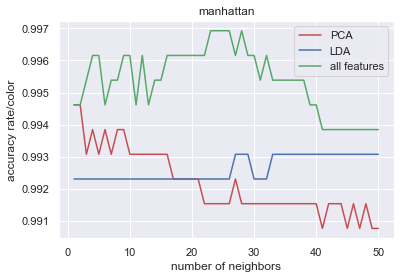

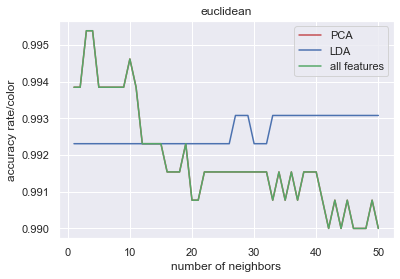

In [6]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
pca=PCA().fit(X_train)
X_train_PCA=pca.transform(X_train)
X_test_PCA=pca.transform(X_test)
lda=LinearDiscriminantAnalysis().fit(X_train,y1_train)
X_train_LDA=lda.transform(X_train)
X_test_LDA=lda.transform(X_test)
for i in range(3):
    result1=[]
    result2=[]
    result3=[]
    for n in neighbors:
        if(i==0):
            neigh_1=KNeighborsClassifier(n_neighbors=n)
            neigh_2 = KNeighborsClassifier(n_neighbors=n)
            neigh_3 = KNeighborsClassifier(n_neighbors=n)
        elif(i==1):
            neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
            neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
            neigh_3=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
        else:
            neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
            neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
            neigh_3=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
        neigh_1.fit(X_train_PCA,y1_train)
        neigh_2.fit(X_train_LDA,y1_train)
        neigh_3.fit(X_train,y1_train)
        result1.append(neigh_1.score(X_test_PCA,y1_test))
        result2.append(neigh_2.score(X_test_LDA,y1_test))
        result3.append(neigh_3.score(X_test,y1_test))
    if(i==0):
        plt.title("default")
    elif(i==1):
        plt.title("manhattan")
    else:
        plt.title("euclidean")
    plt.xlabel('number of neighbors')
    plt.ylabel('accuracy rate/color')
    plt.plot(neighbors, result1,'r',label="PCA")
    plt.plot(neighbors, result2,'b',label="LDA")
    plt.plot(neighbors, result3,'g',label="all features")
    plt.legend()
    plt.show()

In [7]:
set_1=D
#set_2 generated by PCA model
set_3=['residual sugar', 'chlorides', 'total sulfur dioxide', 'density']
#set_4 will be automaticlly generated by LDA model

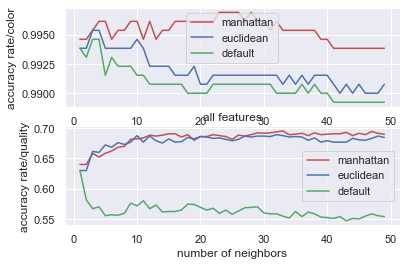

In [8]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[set_1].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
neighbors=range(1,50)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.title('all features')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

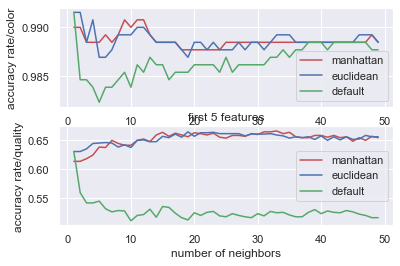

In [9]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[D].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
pca=PCA(n_components=5).fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
neighbors=range(1,50)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.title('first 5 features')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

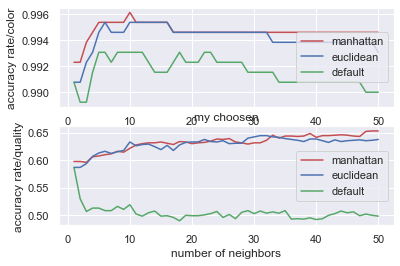

In [10]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[set_3].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
neighbors=range(1,51)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.title('my choosen')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

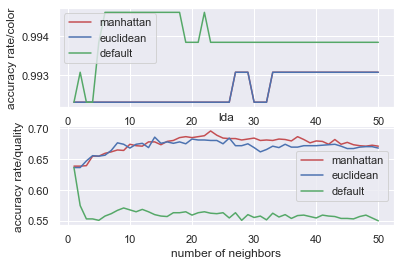

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[D].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
lda=LinearDiscriminantAnalysis().fit(X_train,y1_train)
X_train=lda.transform(X_train)
X_test=lda.transform(X_test)
neighbors=range(1,51)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
X = wine[D].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
lda=LinearDiscriminantAnalysis().fit(X_train,y2_train)
X_train=lda.transform(X_train)
X_test=lda.transform(X_test)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.title('lda')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

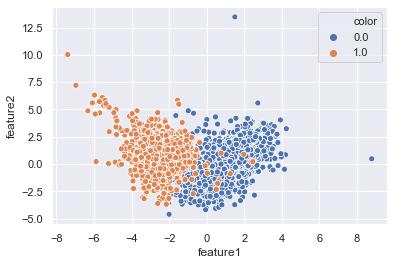

In [12]:
pca=PCA(n_components=2).fit(wine[D])
X1=pd.DataFrame(pca.transform(wine[D]))
X1.columns=['feature1','feature2']
X1['color']=wine[C].values
X1['quality']=wine[L].values
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="color", data=X1)


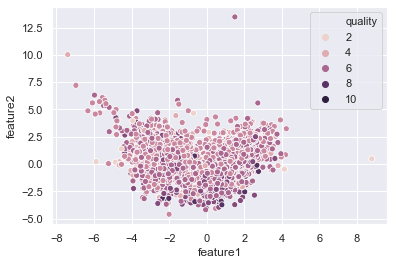

In [13]:
pca=PCA(n_components=2).fit(wine[D])
X1=pd.DataFrame(pca.transform(wine[D]))
X1.columns=['feature1','feature2']
X1['color']=wine[C].values
X1['quality']=wine[L].values
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="quality", data=X1)

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


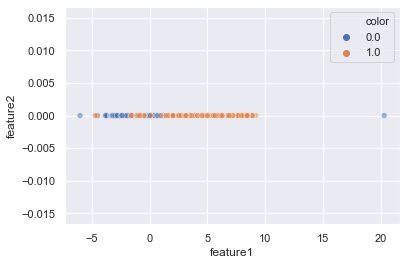

In [14]:
lda=LinearDiscriminantAnalysis(n_components=2).fit(wine[D],wine[C])
X2=lda.transform(wine[D])
X2=np.column_stack((X2,[0 for i in range(len(X2))]))
X2=pd.DataFrame(X2)
X2.columns=['feature1','feature2']
X2['color']=wine[C].values
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="color", data=X2,alpha=0.5)

#g = sns.pairplot(X2, height=3,vars=['feature1','feature2'],hue='quality')

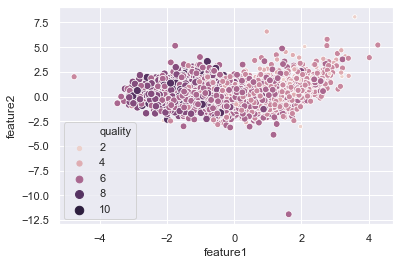

In [15]:
lda=LinearDiscriminantAnalysis(n_components=2).fit(wine[D],wine[L])
X2=lda.transform(wine[D])
X2=pd.DataFrame(X2)
X2.columns=['feature1','feature2']
X2['quality']=wine[L].values
g = sns.scatterplot(x="feature1", y="feature2",size='quality',
                     hue="quality", data=X2)

bonus 2 code

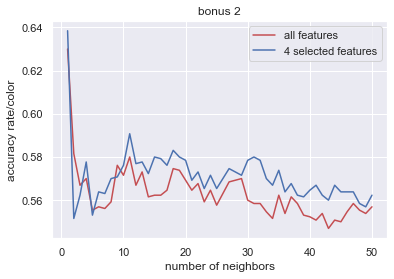

In [16]:
f=['volatile acidity', 'total sulfur dioxide', 'density', 'alcohol']
result1=[]
result2=[]
X1_train, X1_test, y1_train, y1_test = train_test_split(wine[D], y2, test_size=0.2, random_state = ran) 
X2_train, X2_test, y2_train, y2_test = train_test_split(wine[f], y2, test_size=0.2, random_state = ran) 
for n in neighbors:
    result1.append(KNeighborsClassifier(n_neighbors=n).fit(X1_train,y1_train).score(X1_test,y1_test))
    result2.append(KNeighborsClassifier(n_neighbors=n).fit(X2_train,y2_train).score(X2_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.title('bonus 2')
plt.plot(neighbors, result1,'r',label="all features")
plt.plot(neighbors, result2,'b',label="4 selected features")
plt.legend()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns; sns.set()
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
handWritten = pd.read_csv("DataB.csv", sep=',')
handWritten.drop(columns=[handWritten.columns[0]],axis=1,inplace=True)
V = ['fea.'+str(i+1) for i in range(784)]
R = 'gnd'
VR = V +[R]
SS = StandardScaler()
handWritten[V] = SS.fit_transform(handWritten[V])

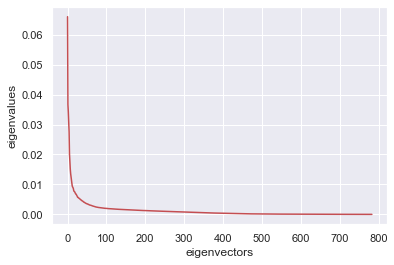

In [3]:
from sklearn.decomposition import PCA
pca=PCA().fit(handWritten[V])
y=pca.explained_variance_ratio_
x=pca.components_
plt.xticks = [range(0,20,1)]
plt.xlabel('eigenvectors')
plt.ylabel('eigenvalues')
plt.plot(y,'r')

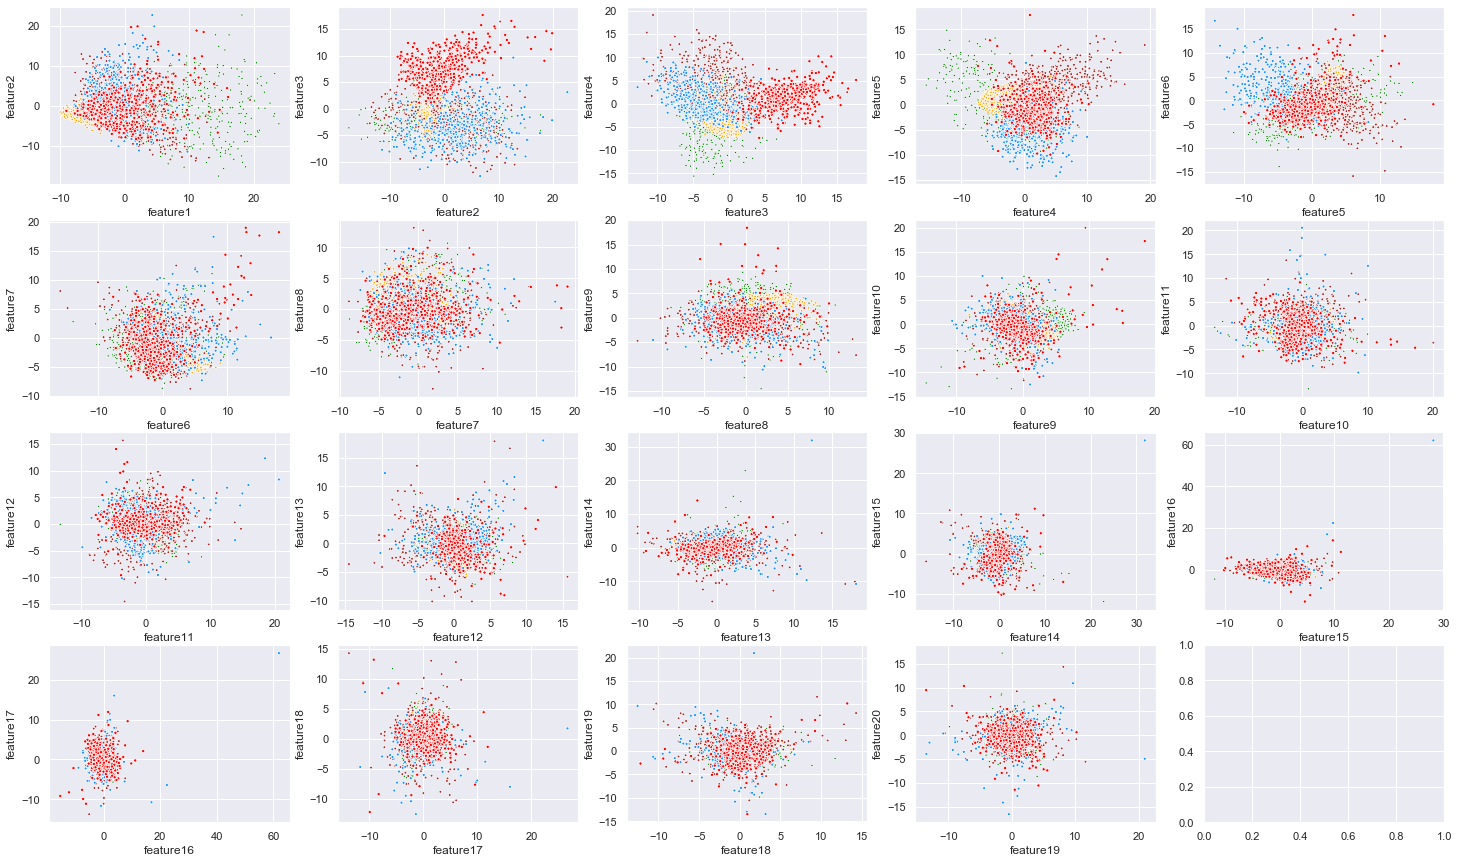

In [4]:
transformer=PCA(n_components=20)
Data = pd.DataFrame(transformer.fit_transform(handWritten[V]))
Data.columns = ['feature'+str(i+1) for i in range(20)]
Data['gnd'] = handWritten['gnd']
fig, axes =plt.subplots(4,5,figsize=(25,15))
for j in range(19):
    sns.scatterplot(x="feature"+str(j+1), y="feature"+str(j+2),
                    ax=axes[int(j/5)][j%5],size='gnd' ,sizes=(5,10),legend = False ,hue="gnd", data=Data,palette=['green','orange','brown','dodgerblue','red'])

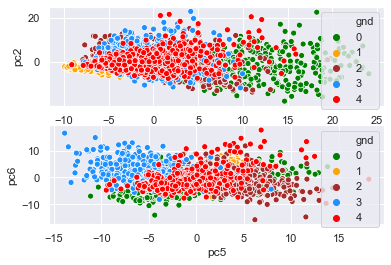

In [5]:
pca=PCA(n_components=6).fit(handWritten.values)
X1=pd.DataFrame(pca.transform(handWritten))
X1.columns=['pc'+str(i+1) for i in range(6)]
X1['gnd']=handWritten['gnd']
fig, axes =plt.subplots(2,1)
sns.scatterplot(x="pc1", y="pc2",hue="gnd",ax=axes[0], data=X1,palette=['green','orange','brown','dodgerblue','red'])
sns.scatterplot(x="pc5", y="pc6",hue="gnd",ax=axes[1], data=X1,palette=['green','orange','brown','dodgerblue','red'])

In [6]:
#svd implementation
import numpy.linalg as linalg
def my_svd(X):
    n, m = X.shape
    eigValueU , eigVectorU = linalg.eigh(np.dot(X, X.T))
    eigValueV , eigVectorV = linalg.eigh(np.dot(X.T, X))
    indexU = eigValueU.argsort()[::-1]
    indexV = eigValueV.argsort()[::-1]
    eigValueU = eigValueU[indexU]
    eigVectorU = eigVectorU[:,indexU ]
    eigValueV = eigValueV[indexV]
    eigVectorV = eigVectorV[:,indexV]
    if n>m:
        sigma=np.sqrt(eigValueU)
    else:
        sigma=np.sqrt(eigValueV)
    return eigVectorU, sigma ,eigVectorV.T

In [7]:
import time
from statistics import mean 

In [8]:
data = handWritten[V].values
#pca
time_start = time.perf_counter()
eigValueU , eigVectorU = linalg.eigh(np.dot(data.T, data))
indexU = eigValueU.argsort()[::-1]
eigValueU = eigValueU[indexU]
eigVectorU = eigVectorU[:,indexU ]
X_pca = eigVectorU.T.dot(data.T).T
time_over = time.perf_counter()
print("running time: "+str(time_over-time_start))
print(X_pca)

running time: 0.3689922300000035
[[ 9.97069222e+00  6.18172201e+00 -4.99286326e+00 ... -2.84664097e-02
   6.97997657e-02  7.44883255e-02]
 [ 1.14159998e+01  6.94158705e+00 -5.06302886e+00 ... -2.28147473e-01
   4.55949595e-02  6.14775845e-02]
 [ 3.69011918e+00  4.69309729e+00 -2.90865640e+00 ...  1.15182625e-01
  -5.60241248e-03  3.14112641e-02]
 ...
 [-3.49421529e-01  9.33681056e-01  8.10744188e+00 ... -6.93521885e-02
  -8.49495279e-02 -1.65756817e-02]
 [-3.11526327e+00  2.09047425e+00  6.27251911e+00 ...  1.26995790e-01
   1.46191708e-02  2.07556239e-03]
 [-5.64409375e+00 -2.46166632e-01  4.14018317e+00 ...  1.57632818e-02
  -1.77113186e-02 -1.11643749e-02]]


dual pca via SVD

In [9]:
#dual_pca
time_start = time.perf_counter()
U,s,VT = my_svd(data.T)
time_over = time.perf_counter()
print("svd running time: "+str(time_over-time_start))
time_start = time.perf_counter()
X_dual_PCA = np.diag(s).dot(VT)[:784].T
time_over = time.perf_counter()
print("dual pca running time: "+str(time_over-time_start))
print(X_dual_PCA)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


svd running time: 3.444919376999998
dual pca running time: 0.5355880999999982
[[ 9.97069222e+00 -6.18172201e+00  4.99286326e+00 ...  2.84664097e-02
  -6.97997657e-02  7.44883255e-02]
 [ 1.14159998e+01 -6.94158705e+00  5.06302886e+00 ...  2.28147473e-01
  -4.55949595e-02  6.14775845e-02]
 [ 3.69011918e+00 -4.69309729e+00  2.90865640e+00 ... -1.15182625e-01
   5.60241248e-03  3.14112641e-02]
 ...
 [-3.49421529e-01 -9.33681056e-01 -8.10744188e+00 ...  6.93521885e-02
   8.49495279e-02 -1.65756817e-02]
 [-3.11526327e+00 -2.09047425e+00 -6.27251911e+00 ... -1.26995790e-01
  -1.46191708e-02  2.07556239e-03]
 [-5.64409375e+00  2.46166632e-01 -4.14018317e+00 ... -1.57632818e-02
   1.77113186e-02 -1.11643749e-02]]


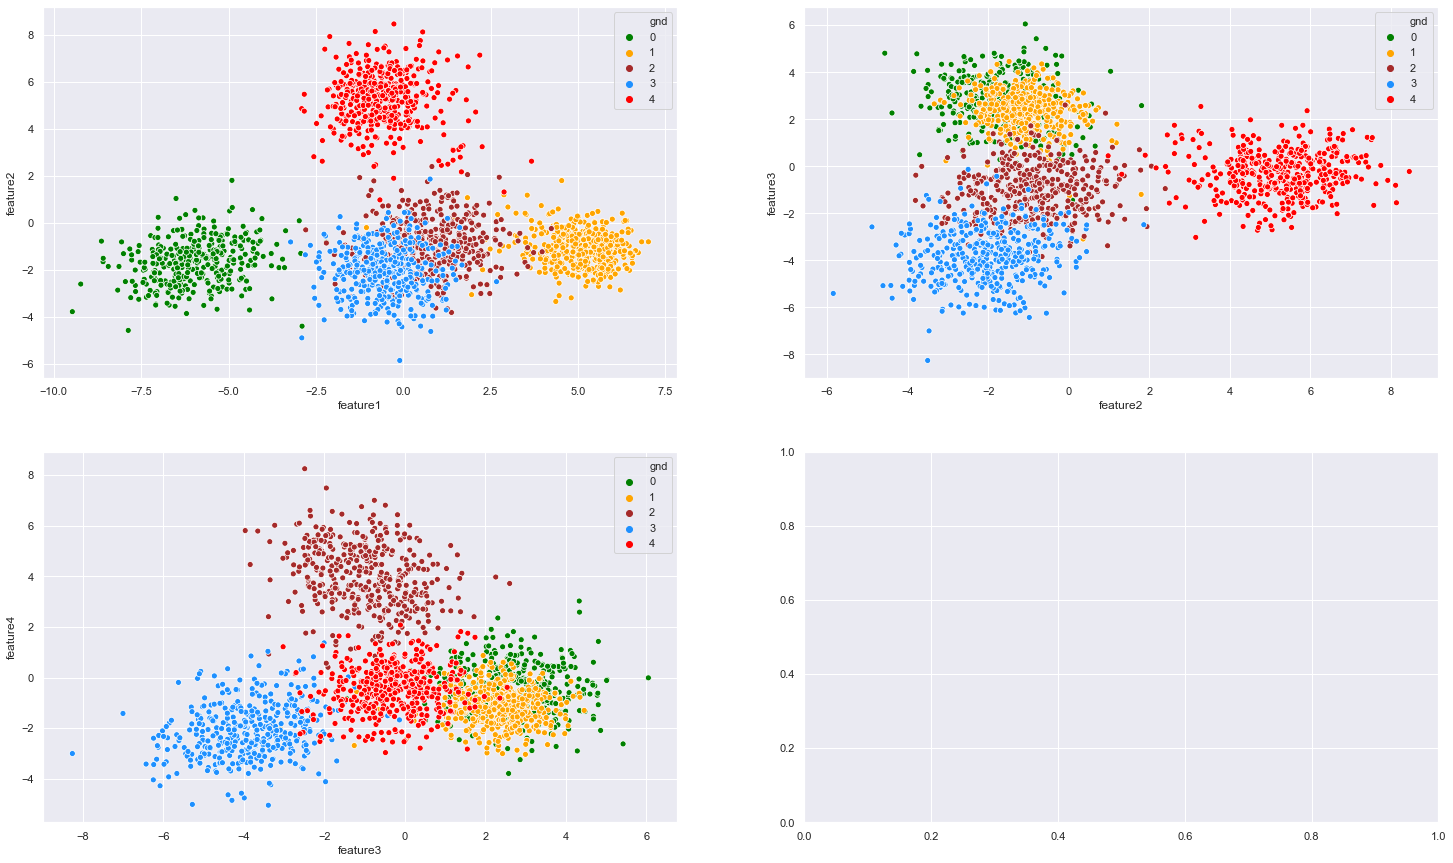

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
transformer=LinearDiscriminantAnalysis()
Data = pd.DataFrame(transformer.fit_transform(handWritten[V],handWritten[R]))
Data.columns = ['feature'+str(i+1) for i in range(4)]
Data['gnd'] = handWritten['gnd']
fig, axes =plt.subplots(2,2,figsize=(25,15))
for j in range(3):
    sns.scatterplot(x="feature"+str(j+1), y="feature"+str(j+2),
                    ax=axes[int(j/2)][j%2],legend = 'full' ,hue="gnd", data=Data,palette=['green','orange','brown','dodgerblue','red'])

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns; sns.set()
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
handWritten = pd.read_csv("DataB.csv", sep=',')
handWritten.drop(columns=[handWritten.columns[0]],axis=1,inplace=True)
V = ['fea.'+str(i+1) for i in range(784)]
R = 'gnd'
VR = V +[R]
SS = StandardScaler()
handWritten[V] = SS.fit_transform(handWritten[V])

In [3]:
import time

0.956899881362915


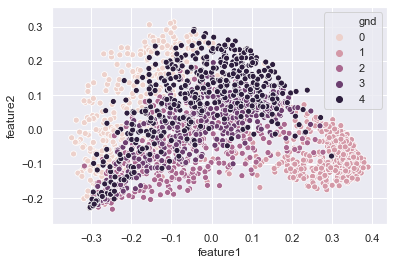

In [4]:
from sklearn.decomposition import KernelPCA
start = time.time()
transformer = KernelPCA(n_components=2, kernel='rbf')
kernelPCAData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
kernelPCAData.columns = ['feature1','feature2']
kernelPCAData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=kernelPCAData ,legend = 'full')
end = time.time()
print(str(end - start))

14.923115015029907


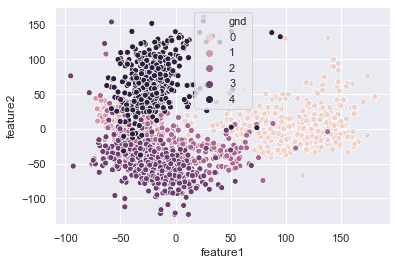

In [5]:
from sklearn.manifold import Isomap
start = time.time()
transformer = Isomap(n_components=2)
IsomapData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
IsomapData.columns = ['feature1','feature2']
IsomapData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=IsomapData,legend = 'full')
end = time.time()
print(str(end - start))

10.226557970046997


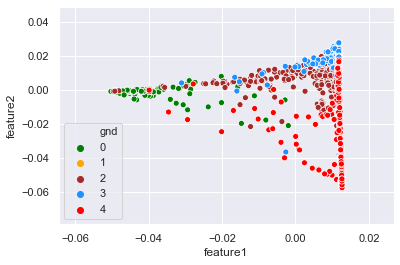

In [6]:
from sklearn.manifold import LocallyLinearEmbedding
start = time.time()
transformer = LocallyLinearEmbedding(n_components=2, random_state = 42)
LLEData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
LLEData.columns = ['feature1','feature2']
LLEData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=LLEData,legend = 'full',palette=['green','orange','brown','dodgerblue','red'])
end = time.time()
print(str(end - start))

I added some plots to see if LLE can separate the points in higher dimensions.

11.882560968399048


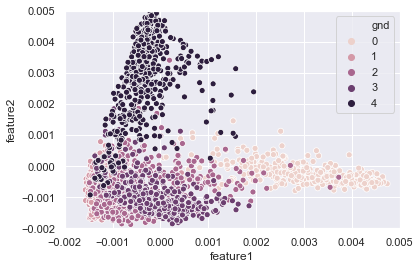

In [7]:
from sklearn.manifold import SpectralEmbedding
start = time.time()
transformer = SpectralEmbedding(n_components=2)
SEData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
SEData.columns = ['feature1','feature2']
SEData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=SEData,legend = 'full')
g.set(xlim=(-0.002,0.005))
g.set(ylim=(-0.002,0.005))
end = time.time()
print(str(end - start))

60.011224031448364


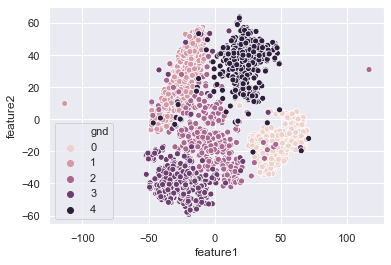

In [8]:
from sklearn.manifold import TSNE
start = time.time()
transformer = TSNE(n_components=2, random_state = 42)
TSNEData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
TSNEData.columns = ['feature1','feature2']
TSNEData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=TSNEData,legend = 'full')
end = time.time()
print(str(end - start))